In [27]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

In [28]:
ds = pd.read_csv('titanic.csv')
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [29]:
ds.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [30]:
cols_to_drop = {
    'PassengerId',
    'Name',
    'Ticket',
    'Cabin',
    'Embarked'
}
df = ds.drop(cols_to_drop,axis=1)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500


In [31]:
def convert_sex_to_num(s):
    if s == 'male':
        return 0
    elif s == 'female':
        return 1
    else:
        return s

df.Sex = df.Sex.map(convert_sex_to_num)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,0,22.0,1,0,7.2500
1,1,1,1,38.0,1,0,71.2833
2,1,3,1,26.0,0,0,7.9250
3,1,1,1,35.0,1,0,53.1000
4,0,3,0,35.0,0,0,8.0500


In [32]:
data = df.dropna()
data.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
count,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000
mean,0.406162,2.236695,0.365546,29.699118,0.512605,0.431373,34.694514
std,0.491460,0.838250,0.481921,14.526497,0.929783,0.853289,52.918930
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,20.125000,0.000000,0.000000,8.050000
50%,0.000000,2.000000,0.000000,28.000000,0.000000,0.000000,15.741700
75%,1.000000,3.000000,1.000000,38.000000,1.000000,1.000000,33.375000
max,1.000000,3.000000,1.000000,80.000000,5.000000,6.000000,512.329200


          Survived    Pclass       Sex       Age     SibSp     Parch      Fare
Survived  1.000000 -0.359653  0.538826 -0.077221 -0.017358  0.093317  0.268189
Pclass   -0.359653  1.000000 -0.155460 -0.369226  0.067247  0.025683 -0.554182
Sex       0.538826 -0.155460  1.000000 -0.093254  0.103950  0.246972  0.184994
Age      -0.077221 -0.369226 -0.093254  1.000000 -0.308247 -0.189119  0.096067
SibSp    -0.017358  0.067247  0.103950 -0.308247  1.000000  0.383820  0.138329
Parch     0.093317  0.025683  0.246972 -0.189119  0.383820  1.000000  0.205119
Fare      0.268189 -0.554182  0.184994  0.096067  0.138329  0.205119  1.000000


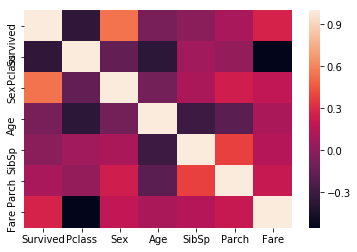

In [33]:
print(data.corr())
plt.figure()
sns.heatmap(data.corr())
# which are in black, they are inversely correlated and which are very light they relate linearly

In [34]:
input_cols = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']
out_cols = ['Survived']

X = data[input_cols]
y = data[out_cols]

# X.head()
print(X.shape,y.shape)

(714, 6) (714, 1)


In [35]:
data = data.reset_index(drop=True)
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,0,22.0,1,0,7.2500
1,1,1,1,38.0,1,0,71.2833
2,1,3,1,26.0,0,0,7.9250
3,1,1,1,35.0,1,0,53.1000
4,0,3,0,35.0,0,0,8.0500


In [38]:
data.loc[2]

Survived     1.000
Pclass       3.000
Sex          1.000
Age         26.000
SibSp        0.000
Parch        0.000
Fare         7.925
Name: 2, dtype: float64

In [44]:
# let , fkey = Pclass and fval be its mean
# xdata.columns = Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')
def divide_data(xdata,fkey,fval):
    x_right = pd.DataFrame([],columns = xdata.columns)
    x_left = pd.DataFrame([],columns=xdata.columns)
    
    for ix in range(xdata.shape[0]): # 714 times for the root node
        # Retrieve the current value for the fkey column
        val = xdata[fkey].loc[ix] # same as xdata['Pclass'][0], row ki value
        
        # Check where the row needs to go
        if val > fval:
            # pass the row to right
            x_right = x_right.append(xdata.loc[ix]) # puri row aa jayegi
        else:
            # pass the row to left
            x_left = x_left.append(xdata.loc[ix])
    
    # return the divided datasets
    return x_left,x_right

def entropy(col):
    counts = np.unique(col,return_counts=True) # 0's kitne h and 1 kitne h
    
    N = float(col.shape[0]) # total elements
    ent=0.0
    
    for ix in range(counts[1].shape[0]): #look into frequency vla part (0,1)=>(7,3)
        f = counts[1][ix] / N # f = p =probaility eg 7/10
        ent += (-1.0 * f * np.log2(f)) # -plogp
        
    return ent
        
def information_gain(xdata,fkey,fval):
    left,right = divide_data(xdata,fkey,fval)
    
    P = float(left.shape[0])/xdata.shape[0]
    Q = float(right.shape[0])/xdata.shape[0]
    
    if left.shape[0] == 0 or right.shape[0] == 0:
        return -10000
    
    return entropy(xdata.Survived) - (P*entropy(left.Survived)+Q*entropy(right.Survived))

In [45]:
for fx in X.columns:
    print(fx)
    print(information_gain(data,fx,data[fx].mean()))

Pclass
0.0841581440715109
Sex
0.21601606075154256
Age
2.6666107433293007e-08
SibSp
0.006904127996153919
Parch
0.019278172321014586
Fare
0.05371958996365245


In [47]:
class DecisionTree:
    # starting constuctor
    def __init__(self,depth=0,max_depth=5):
        self.left = None
        self.right = None
        self.fkey = None
        self.fval = None
        self.max_depth = max_depth
        self.depth = depth
        self.target = None
    
    def train(self,X_train):
        print(self.depth,'-'*10)
        # Get the best possible feature and division value
        features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']
        gains = []
        for fx in features:
            gains.append(information_gain(X_train, fx, X_train[fx].mean()))
        
        # store the best feature (using min information gain)
        self.fkey = features[np.argmax(gains)]
        self.fval = X_train[self.fkey].mean()
        
         # divide the dataset
        data_left, data_right = divide_data(X_train, self.fkey, self.fval)
        data_left = data_left.reset_index(drop=True)
        data_right = data_right.reset_index(drop=True)
        
        # Check the shapes
        # boundary conditions: assign the values to leaf nodes and now vapas jao
        if data_left.shape[0] == 0 or data_right.shape[0] == 0:
            if X_train.Survived.mean() >= 0.5:
                self.target = 'Survived'
            else:
                self.target = 'Dead'
            return
    
        if self.depth >= self.max_depth:
            if X_train.Survived.mean() >= 0.5:
                self.target = 'Survived'
            else:
                self.target = 'Dead'
            return
        
        # branch to right
        self.right = DecisionTree(depth=self.depth+1, max_depth=self.max_depth)
        self.right.train(data_right)
        # branch to left
        self.left = DecisionTree(depth=self.depth+1, max_depth=self.max_depth)
        self.left.train(data_left)
        
        if X_train.Survived.mean() >= 0.5:
            self.target = 'Survived'
        else:
            self.target = 'Dead'
        
        return
    
    def predict(self,test):
        if test[self.fkey] > self.fval:
            # go right
            if self.right is None:
                return self.target
            return self.right.predict(test)
        else:
            # go left
            if self.left is None:
                return self.target
            return self.left.predict(test)

In [48]:
split = int(0.8*data.shape[0])

training_data = data[:split]
testing_data = data[:split]

In [49]:
dt = DecisionTree()
dt.train(training_data)

0 ----------
1 ----------
2 ----------
3 ----------
4 ----------
5 ----------
5 ----------
4 ----------
5 ----------
5 ----------
3 ----------
4 ----------
5 ----------
5 ----------
4 ----------
5 ----------
5 ----------
2 ----------
3 ----------
4 ----------
5 ----------
5 ----------
4 ----------
5 ----------
5 ----------
3 ----------
4 ----------
5 ----------
5 ----------
4 ----------
5 ----------
5 ----------
1 ----------
2 ----------
3 ----------
4 ----------
5 ----------
5 ----------
4 ----------
5 ----------
5 ----------
3 ----------
4 ----------
5 ----------
5 ----------
4 ----------
5 ----------
5 ----------
2 ----------
3 ----------
4 ----------
5 ----------
5 ----------
4 ----------
5 ----------
5 ----------
3 ----------
4 ----------
5 ----------
5 ----------
4 ----------
5 ----------
5 ----------


In [51]:
print (dt.fkey, dt.fval)
print (dt.right.fkey, dt.right.fval)
print (dt.left.fkey, dt.left.fval)

print (dt.right.right.fkey, dt.right.right.fval)
print (dt.right.left.fkey, dt.right.left.fval)


print (dt.left.right.fkey, dt.left.right.fval)
print (dt.left.left.fkey, dt.left.left.fval)


Sex 0.36777583187390545
Pclass 2.080952380952381
Fare 28.257881994459833
SibSp 0.9036144578313253
Age 30.830708661417322
SibSp 1.0721649484536082
Fare 12.418069696969695


In [53]:
for ix in testing_data.index[:10]:
    print (dt.predict(testing_data.loc[ix]))
    print (testing_data.loc[ix])
    print ('-'*80)

Dead
Survived     0.00
Pclass       3.00
Sex          0.00
Age         22.00
SibSp        1.00
Parch        0.00
Fare         7.25
Name: 0, dtype: float64
--------------------------------------------------------------------------------
Survived
Survived     1.0000
Pclass       1.0000
Sex          1.0000
Age         38.0000
SibSp        1.0000
Parch        0.0000
Fare        71.2833
Name: 1, dtype: float64
--------------------------------------------------------------------------------
Survived
Survived     1.000
Pclass       3.000
Sex          1.000
Age         26.000
SibSp        0.000
Parch        0.000
Fare         7.925
Name: 2, dtype: float64
--------------------------------------------------------------------------------
Survived
Survived     1.0
Pclass       1.0
Sex          1.0
Age         35.0
SibSp        1.0
Parch        0.0
Fare        53.1
Name: 3, dtype: float64
--------------------------------------------------------------------------------
Dead
Survived     0.00
Pclass 

In [54]:
testing_data.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,0,22.0,1,0,7.2500
1,1,1,1,38.0,1,0,71.2833
2,1,3,1,26.0,0,0,7.9250
3,1,1,1,35.0,1,0,53.1000
4,0,3,0,35.0,0,0,8.0500
5,0,1,0,54.0,0,0,51.8625
6,0,3,0,2.0,3,1,21.0750
7,1,3,1,27.0,0,2,11.1333
8,1,2,1,14.0,1,0,30.0708
9,1,3,1,4.0,1,1,16.7000


In [55]:
import sklearn

In [56]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [57]:
DT = DecisionTreeClassifier()
DT.fit(X[:split],y[:split])

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [59]:
DT.score(X[split:],y[split:])

0.7902097902097902

In [64]:
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X[:split], y[:split])

rf.score(X[split:], y[split:])

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


0.8391608391608392